<a href="https://colab.research.google.com/github/Justin-Jonany/IndoFoodNet/blob/main/1_eda_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IndoFoodNet
IndoFoodNet aims to create a neural networks model that correctly classifies images of 9 differet Padang food. The dataset is taken from https://www.kaggle.com/datasets/faldoae/padangfood.


## Project Goal
This project aims to create a neural network that classified 9 classes of Padang food images. The metrics that will be used to compare the models are **loss** and **weighted f1-score**. This notebook aims to get  **0.95 (95%) weighted f1-score**.

The main challenge of this notebook would be to create an effective neural network with limited data of around 70 images per class.

</br>

## Notebook Goal

This notebook aims to explore the data and preprocess the data

## Check GPU

We need a gpu with 7.0 or more computing capability

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4c200610-0c9a-0770-5a23-5d6f1a39f332)


## Importing the Needed Libraries

In [ ]:
pip install split-folders

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import mixed_precision
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json
import shutil
import random
import splitfolders

## Helper Functions

In [ ]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  It prints
    number of subdiretories in dir_path
    number of images (files) in each subdirectory
    name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def show_image(class_name, path, imshowed=True):
  '''
  Visualizes some images from class class_name with parent directory path (don't
  include the class's folder)
  '''

  path_full = path + class_name
  random_image = random.choice(os.listdir(path_full))
  random_image_path = path_full + '/' + random_image

  img = tf.io.read_file(random_image_path)
  img = tf.image.decode_image(img)

  if imshowed:
    plt.imshow(img)
    plt.title(class_name, weight='bold')
    plt.axis(False)
  else:
    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


## Get Dataset

In [ ]:
walk_through_dir('/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data')

There are 9 directories and 0 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data'.
There are 0 directories and 103 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data/telur_dadar'.
There are 0 directories and 103 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data/daging_rendang'.
There are 0 directories and 103 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data/gulai_tambusu'.
There are 0 directories and 103 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data/telur_balado'.
There are 0 directories and 103 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data/ayam_goreng'.
There are 0 directories and 103 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data/ayam_pop'.
There are 0 directories and 103 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data/gulai_ikan'.
Ther

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/full_data', output="/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data", seed=1337, ratio=(.7, 0.1,0.2))

In [ ]:
walk_through_dir('/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data')

There are 3 directories and 0 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data'.
There are 9 directories and 0 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/telur_dadar'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/daging_rendang'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/gulai_tambusu'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/telur_balado'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/ayam_goreng'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/p

In [ ]:
train_dir = '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/'
test_dir = '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/test/'
val_dir = '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/val/'

## Exploratory Data Analysis (EDA)

In [ ]:
for i in os.listdir(train_dir):
  print(i)

class_names = os.listdir(train_dir)

telur_dadar
daging_rendang
gulai_tambusu
telur_balado
ayam_goreng
ayam_pop
gulai_ikan
gulai_tunjang
dendeng_batokok


In [ ]:
walk_through_dir('/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/')

There are 9 directories and 0 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/telur_dadar'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/daging_rendang'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/gulai_tambusu'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/telur_balado'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/ayam_goreng'.
There are 0 directories and 72 images in '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/splitted_data/train/ayam_pop'.
There are 0 directories and 72 images in '/content/drive/MyDrive

Each class has 72 images

In [ ]:
img = show_image(random.choice(os.listdir(train_dir)), train_dir, False)
img

<tf.Tensor: shape=(532, 751, 3), dtype=uint8, numpy=
array([[[151,  76,  83],
        [150,  75,  82],
        [148,  72,  82],
        ...,
        [ 86,  79,  73],
        [ 90,  83,  77],
        [ 93,  84,  79]],

       [[145,  70,  77],
        [144,  69,  76],
        [142,  66,  76],
        ...,
        [ 80,  73,  67],
        [ 83,  76,  70],
        [ 87,  78,  73]],

       [[139,  64,  71],
        [137,  62,  69],
        [134,  61,  70],
        ...,
        [ 78,  71,  63],
        [ 79,  72,  64],
        [ 83,  74,  67]],

       ...,

       [[156, 151, 157],
        [155, 150, 156],
        [155, 150, 156],
        ...,
        [160, 155, 161],
        [160, 155, 161],
        [160, 155, 161]],

       [[156, 151, 157],
        [156, 151, 157],
        [155, 150, 156],
        ...,
        [158, 153, 159],
        [158, 153, 159],
        [159, 154, 160]],

       [[156, 151, 157],
        [156, 151, 157],
        [155, 150, 156],
        ...,
        [156, 151, 15

In [ ]:
# What are the min and max values of our imgae tensor?
print(f'The min value of our image is {tf.reduce_min(img)}')
print(f'The min value of our image is {tf.reduce_max(img)}')
print(f'The dtype of our image is {img.dtype}')
print(f'The shape of our image is {img.shape}')

The min value of our image is 0
The min value of our image is 255
The dtype of our image is <dtype: 'uint8'>
The shape of our image is (532, 751, 3)


In [ ]:
img = show_image(random.choice(os.listdir(train_dir)), train_dir, False)
img.shape

TensorShape([471, 546, 3])

It seems that our images have different shapes

### Visualizing some images


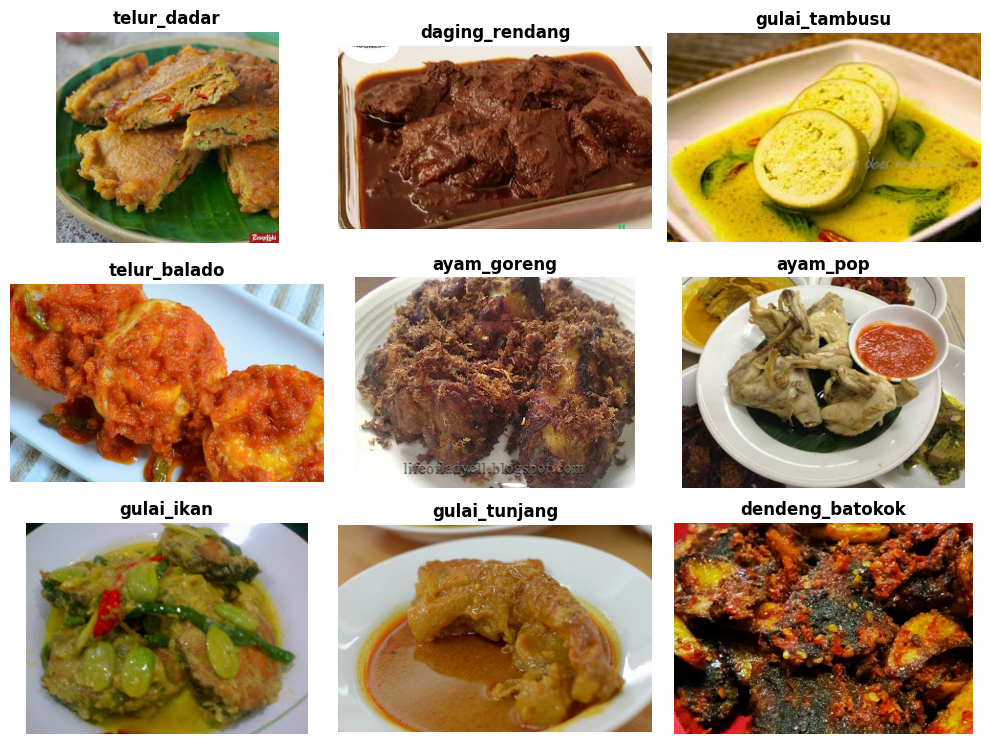

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i, name in enumerate(class_names):
  plt.subplot(4, 3, i + 1)
  show_image(name, train_dir)

fig.tight_layout()

## Batch and prepare datasets

#### For EfficientNetV2B0

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE,).cache()

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()

val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()


Found 648 files belonging to 9 classes.
Found 189 files belonging to 9 classes.
Found 90 files belonging to 9 classes.


In [ ]:
train_data, test_data, val_data

(<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>,
 <CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>,
 <CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>)

In [ ]:
for image, labels in train_data.take(1):
  print(image, labels)

tf.Tensor(
[[[[214.98087   220.98087   235.40944  ]
   [220.08928   227.08928   237.08928  ]
   [219.        225.        239.       ]
   ...
   [218.08928   222.08928   233.08928  ]
   [217.        224.        232.       ]
   [217.        224.        232.       ]]

  [[216.78572   222.78572   237.21428  ]
   [219.8278    226.8278    236.8278   ]
   [217.01913   223.01913   235.01913  ]
   ...
   [219.73215   223.73215   234.73215  ]
   [217.        224.        234.       ]
   [215.26785   222.26785   232.26785  ]]

  [[215.78572   221.78572   236.21428  ]
   [219.        226.        236.       ]
   [218.        225.        233.89285  ]
   ...
   [218.        222.        233.       ]
   [216.64282   222.64282   235.74997  ]
   [215.21423   221.21423   234.32138  ]]

  ...

  [[ 77.92227   177.47574   199.58267  ]
   [ 84.842285  184.39575   206.50269  ]
   [ 84.58536   180.69229   199.24576  ]
   ...
   [ 93.44653   179.10693   189.10693  ]
   [ 92.        179.55347   190.10553  ]
   [ 

In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/processed_data/b0'
tf.data.Dataset.save(train_data, path + 'train_data')
tf.data.Dataset.save(test_data, path + 'test_data')
tf.data.Dataset.save(val_data, path + 'val_data')

#### For EfficientNetV2B1

In [ ]:
IMG_SIZE = (240, 240)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE,).cache()

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()

val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()


Found 648 files belonging to 9 classes.
Found 189 files belonging to 9 classes.
Found 90 files belonging to 9 classes.


In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/processed_data/b1_'
tf.data.Dataset.save(train_data, path + 'train_data')
tf.data.Dataset.save(test_data, path + 'test_data')
tf.data.Dataset.save(val_data, path + 'val_data')

#### For EfficientNetV2B2

In [ ]:
IMG_SIZE = (260, 260)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE,).cache()

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()

val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()


Found 648 files belonging to 9 classes.
Found 189 files belonging to 9 classes.
Found 90 files belonging to 9 classes.


In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/processed_data/b2_'
tf.data.Dataset.save(train_data, path + 'train_data')
tf.data.Dataset.save(test_data, path + 'test_data')
tf.data.Dataset.save(val_data, path + 'val_data')

#### For EfficientNetV2B3

In [ ]:
IMG_SIZE = (300, 300)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE,).cache()

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()

val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE).cache()


Found 648 files belonging to 9 classes.
Found 189 files belonging to 9 classes.
Found 90 files belonging to 9 classes.


In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/projects/IndoFoodNet/processed_data/b3_'
tf.data.Dataset.save(train_data, path + 'train_data')
tf.data.Dataset.save(test_data, path + 'test_data')
tf.data.Dataset.save(val_data, path + 'val_data')